In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import seaborn as sbn
import matplotlib.pyplot as plt

In [ ]:
diabetes_data = pd.read_csv('/python-apt/diabetes_prediction_dataset.csv')

print(diabetes_data.info())
print(diabetes_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0      

In [ ]:
data = pd.get_dummies(diabetes_data, dtype='int8')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   age                          100000 non-null  float64
 1   hypertension                 100000 non-null  int64  
 2   heart_disease                100000 non-null  int64  
 3   bmi                          100000 non-null  float64
 4   HbA1c_level                  100000 non-null  float64
 5   blood_glucose_level          100000 non-null  int64  
 6   diabetes                     100000 non-null  int64  
 7   gender_Female                100000 non-null  int8   
 8   gender_Male                  100000 non-null  int8   
 9   gender_Other                 100000 non-null  int8   
 10  smoking_history_No Info      100000 non-null  int8   
 11  smoking_history_current      100000 non-null  int8   
 12  smoking_history_ever         100000 non-null  int8   
 13  

age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
0  80.0             0              1  25.19          6.6                  140   
1  54.0             0              0  27.32          6.6                   80   
2  28.0             0              0  27.32          5.7                  158   
3  36.0             0              0  23.45          5.0                  155   
4  76.0             1              1  20.14          4.8                  155   

   diabetes  gender_Female  gender_Male  gender_Other  \
0         0              1            0             0   
1         0              1            0             0   
2         0              0            1             0   
3         0              1            0             0   
4         0              0            1             0   

   smoking_history_No Info  smoking_history_current  smoking_history_ever  \
0                        0                        0                     0   
1                        1                        0                     0   
2                        0                        0                     0   
3                        0                        1                     0   
4                        0                        1                     0   

   smoking_history_former  smoking_history_never  smoking_history_not current  
0                       0                      1                            0  
1                       0                      0                            0  
2                       0                      1                            0  
3                       0                      0                            0  
4                       0                      0                            0

In [ ]:
print(min(data['bmi']), max(data['bmi']))
print(min(data['blood_glucose_level']), max(data['blood_glucose_level']))
print(min(data['HbA1c_level']), max(data['HbA1c_level']))

10.01 95.69
80 300
3.5 9.0


In [ ]:
scaler = MinMaxScaler()
data_array = scaler.fit_transform(data)
data = pd.DataFrame(data_array, columns = data.columns)
data.head()

age  hypertension  heart_disease       bmi  HbA1c_level  \
0  1.000000           0.0            1.0  0.177171     0.563636   
1  0.674675           0.0            0.0  0.202031     0.563636   
2  0.349349           0.0            0.0  0.202031     0.400000   
3  0.449449           0.0            0.0  0.156863     0.272727   
4  0.949950           1.0            1.0  0.118231     0.236364   

   blood_glucose_level  diabetes  gender_Female  gender_Male  gender_Other  \
0             0.272727       0.0            1.0          0.0           0.0   
1             0.000000       0.0            1.0          0.0           0.0   
2             0.354545       0.0            0.0          1.0           0.0   
3             0.340909       0.0            1.0          0.0           0.0   
4             0.340909       0.0            0.0          1.0           0.0   

   smoking_history_No Info  smoking_history_current  smoking_history_ever  \
0                      0.0                      0.0                   0.0   
1                      1.0                      0.0                   0.0   
2                      0.0                      0.0                   0.0   
3                      0.0                      1.0                   0.0   
4                      0.0                      1.0                   0.0   

   smoking_history_former  smoking_history_never  smoking_history_not current  
0                     0.0                    1.0                          0.0  
1                     0.0                    0.0                          0.0  
2                     0.0                    1.0                          0.0  
3                     0.0                    0.0                          0.0  
4                     0.0                    0.0                          0.0

In [ ]:
correlations = data.corr()
correlations

age  hypertension  heart_disease       bmi  \
age                          1.000000      0.251171       0.233354  0.337396   
hypertension                 0.251171      1.000000       0.121262  0.147666   
heart_disease                0.233354      0.121262       1.000000  0.061198   
bmi                          0.337396      0.147666       0.061198  1.000000   
HbA1c_level                  0.101354      0.080939       0.067589  0.082997   
blood_glucose_level          0.110672      0.084429       0.070066  0.091261   
diabetes                     0.258008      0.197823       0.171727  0.214357   
gender_Female                0.030480     -0.014318      -0.077832  0.023016   
gender_Male                 -0.030282      0.014423       0.077911 -0.023021   
gender_Other                -0.007348     -0.003816      -0.002718  0.000119   
smoking_history_No Info     -0.276945     -0.117210      -0.052398 -0.222553   
smoking_history_current      0.030946      0.017930       0.007604  0.053617   
smoking_history_ever         0.065768      0.023124       0.040671  0.044343   
smoking_history_former       0.216481      0.083401       0.095194  0.111312   
smoking_history_never        0.065498      0.045953      -0.030843  0.086849   
smoking_history_not current  0.067663      0.000997       0.007922  0.034979   

                             HbA1c_level  blood_glucose_level  diabetes  \
age                             0.101354             0.110672  0.258008   
hypertension                    0.080939             0.084429  0.197823   
heart_disease                   0.067589             0.070066  0.171727   
bmi                             0.082997             0.091261  0.214357   
HbA1c_level                     1.000000             0.166733  0.400660   
blood_glucose_level             0.166733             1.000000  0.419558   
diabetes                        0.400660             0.419558  1.000000   
gender_Female                  -0.020015            -0.017200 -0.037553   
gender_Male                     0.020058             0.017189  0.037666   
gender_Other                   -0.001528             0.000457 -0.004090   
smoking_history_No Info        -0.045979            -0.051635 -0.118939   
smoking_history_current         0.006123             0.012447  0.019606   
smoking_history_ever            0.009655             0.006267  0.024080   
smoking_history_former          0.037306             0.040688  0.097917   
smoking_history_never           0.010684             0.012475  0.027267   
smoking_history_not current     0.009830             0.008613  0.020734   

                             gender_Female  gender_Male  gender_Other  \
age                               0.030480    -0.030282     -0.007348   
hypertension                     -0.014318     0.014423     -0.003816   
heart_disease                    -0.077832     0.077911     -0.002718   
bmi                               0.023016    -0.023021      0.000119   
HbA1c_level                      -0.020015     0.020058     -0.001528   
blood_glucose_level              -0.017200     0.017189      0.000457   
diabetes                         -0.037553     0.037666     -0.004090   
gender_Female                     1.000000    -0.999629     -0.015948   
gender_Male                      -0.999629     1.000000     -0.011285   
gender_Other                     -0.015948    -0.011285      1.000000   
smoking_history_No Info          -0.053810     0.053833     -0.000695   
smoking_history_current          -0.026517     0.026636     -0.004293   
smoking_history_ever             -0.011019     0.010991      0.001062   
smoking_history_former           -0.048927     0.049048     -0.004310   
smoking_history_never             0.098682    -0.098547     -0.005181   
smoking_history_not current       0.011419    -0.011985      0.020760   

                             smoking_history_No Info  smoking_history_current  \
age                                        -0.276945                 0.030

<Axes: >

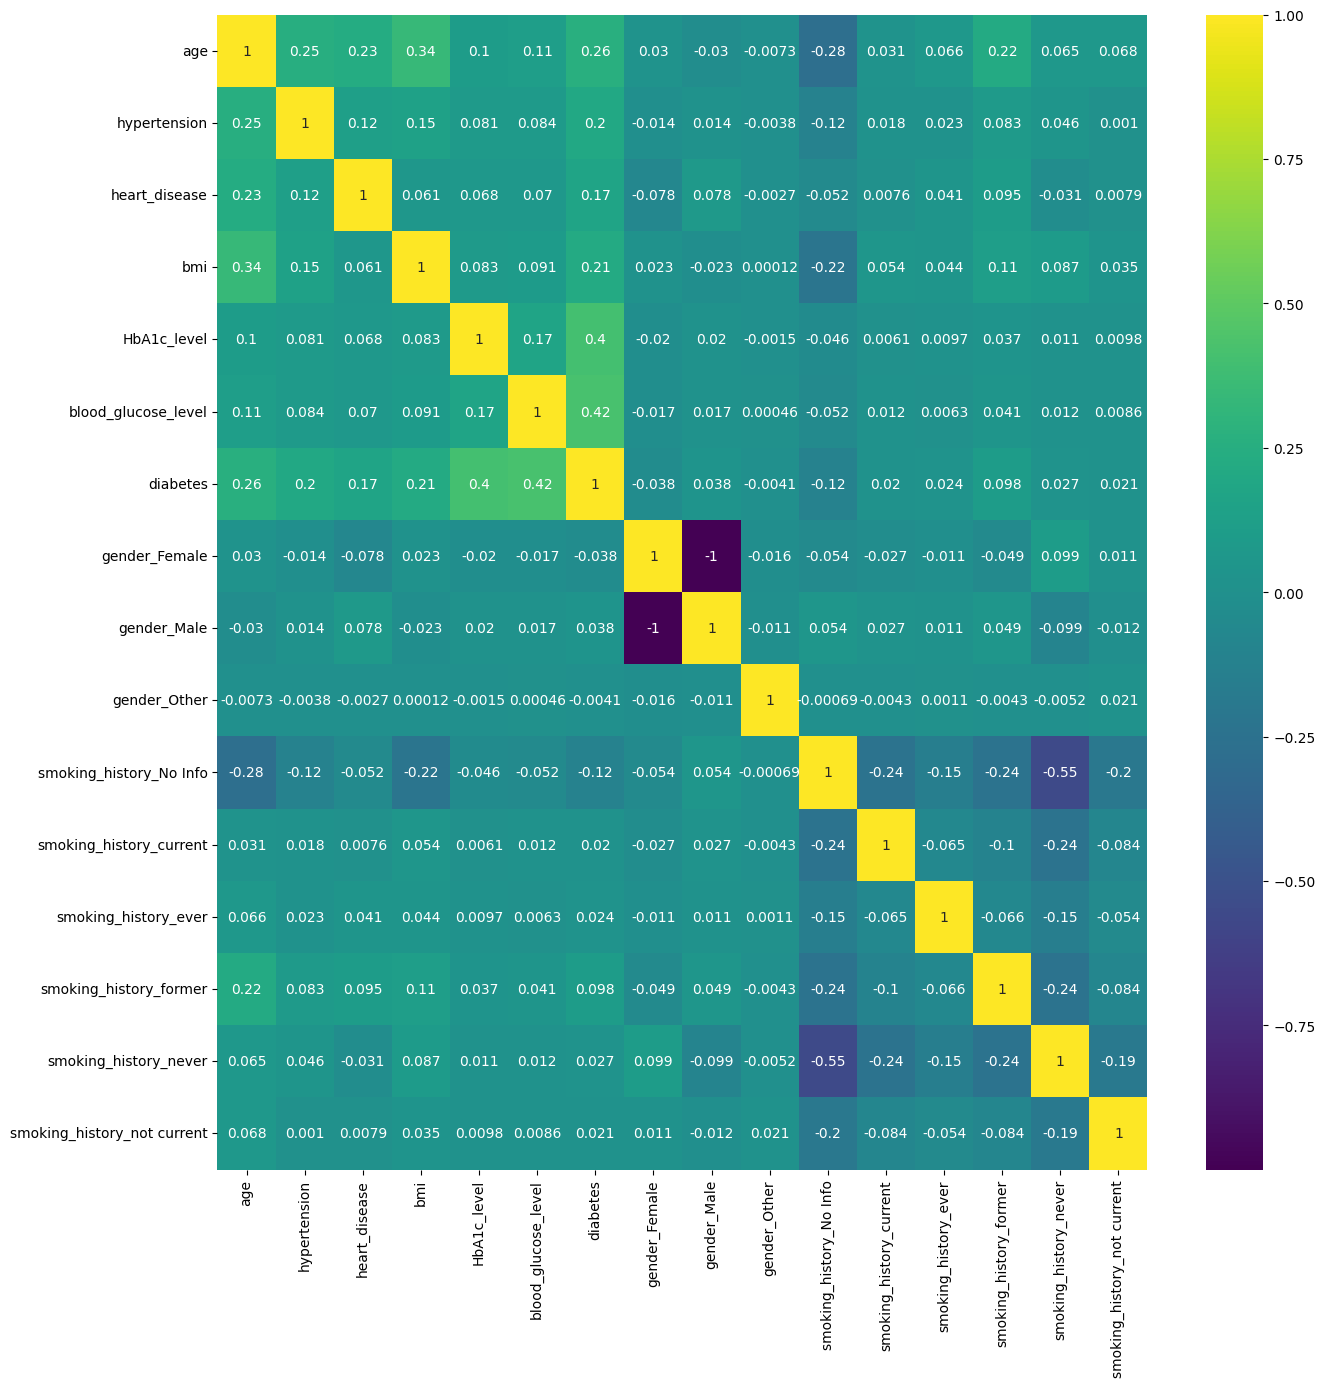

In [ ]:
plt.subplots(figsize=(15, 15))
sbn.heatmap(correlations, cmap='viridis', annot=True)

In [ ]:
data['diabetes'].value_counts().get(1), data['diabetes'].value_counts().get(0)


(np.int64(8500), np.int64(91500))

In [ ]:
diabetes_true = data[ data['diabetes'] == 1]
diabetes_false = data[ data['diabetes'] == 0]


diabetes_false = diabetes_false.sample( len(diabetes_true) )
diabetes_balanced = pd.concat([diabetes_true, diabetes_false], axis=0)

data = diabetes_balanced.sample(frac=1)

data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17000 entries, 68794 to 69184
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          17000 non-null  float64
 1   hypertension                 17000 non-null  float64
 2   heart_disease                17000 non-null  float64
 3   bmi                          17000 non-null  float64
 4   HbA1c_level                  17000 non-null  float64
 5   blood_glucose_level          17000 non-null  float64
 6   diabetes                     17000 non-null  float64
 7   gender_Female                17000 non-null  float64
 8   gender_Male                  17000 non-null  float64
 9   gender_Other                 17000 non-null  float64
 10  smoking_history_No Info      17000 non-null  float64
 11  smoking_history_current      17000 non-null  float64
 12  smoking_history_ever         17000 non-null  float64
 13  smoking_history_f

(            age  hypertension  heart_disease       bmi  HbA1c_level  \
 68794  0.662162           0.0            1.0  0.277778     0.454545   
 61880  0.599600           0.0            0.0  0.206699     0.454545   
 67232  0.061562           0.0            0.0  0.202031     0.272727   
 23005  0.599600           1.0            0.0  0.130836     0.400000   
 69556  0.612112           0.0            0.0  0.308357     0.236364   
 
        blood_glucose_level  diabetes  gender_Female  gender_Male  \
 68794             1.000000       1.0            0.0          1.0   
 61880             0.272727       0.0            1.0          0.0   
 67232             0.000000       0.0            1.0          0.0   
 23005             0.545455       0.0            1.0          0.0   
 69556             0.090909       0.0            0.0          1.0   
 
        gender_Other  smoking_history_No Info  smoking_history_current  \
 68794           0.0                      0.0                      0.0   
 6

In [ ]:
features = data.drop('diabetes', axis=1)
outcomes = data['diabetes']

In [ ]:
train_features, test_features, train_outcomes, test_outcomes = train_test_split(features, outcomes, test_size=0.3)
print(train_features.shape)
print(train_outcomes.shape)

(11900, 15)
(11900,)


In [ ]:
log_model = LogisticRegression(max_iter=1000)

In [ ]:
log_model.fit(train_features, train_outcomes)

LogisticRegression(max_iter=1000)

In [ ]:
predicted_outcomes = log_model.predict(test_features)
predicted_outcomes

array([1., 0., 0., ..., 1., 1., 0.])

In [ ]:
accuracy = metrics.accuracy_score(test_outcomes, predicted_outcomes)
accuracy_percent = accuracy * 100
print(f'Accuracy {accuracy_percent:.2f}%')

Accuracy 88.51%


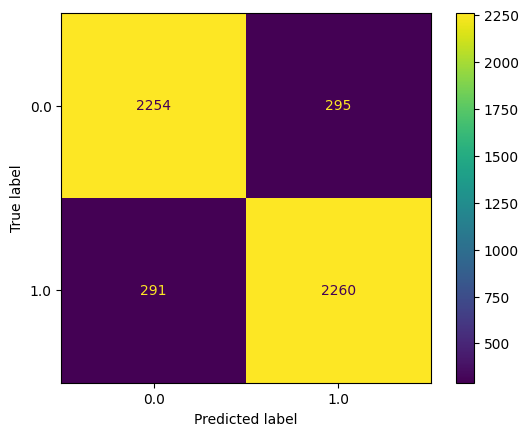

In [ ]:
confusion = metrics.confusion_matrix(test_outcomes, predicted_outcomes)

metrics.ConfusionMatrixDisplay.from_predictions(test_outcomes, predicted_outcomes)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'age'),
  Text(1, 0, 'hypertension'),
  Text(2, 0, 'heart_disease'),
  Text(3, 0, 'bmi'),
  Text(4, 0, 'HbA1c_level'),
  Text(5, 0, 'blood_glucose_level'),
  Text(6, 0, 'gender_Female'),
  Text(7, 0, 'gender_Male'),
  Text(8, 0, 'gender_Other'),
  Text(9, 0, 'smoking_history_No Info'),
  Text(10, 0, 'smoking_history_current'),
  Text(11, 0, 'smoking_history_ever'),
  Text(12, 0, 'smoking_history_former'),
  Text(13, 0, 'smoking_history_never'),
  Text(14, 0, 'smoking_history_not current')])

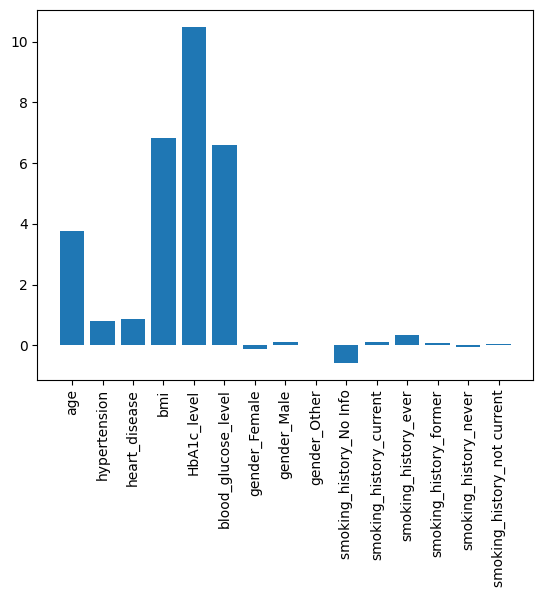

In [ ]:
coefficients = log_model.coef_  # Note the _ at the end
columns = features.columns.to_list()
bar_chart = plt.bar(columns, coefficients[0])
plt.xticks(rotation=90)

In [ ]:
# AFTER you finished training in Colab:
import joblib, json

# X you used for training AFTER get_dummies and BEFORE scaling
# (i.e., the DataFrame you split into train/test)
feature_columns = features.columns.tolist()

joblib.dump(log_model, "diabetes_model.pkl")      # your fitted LogisticRegression
joblib.dump(scaler, "scaler.pkl")                 # your fitted MinMaxScaler
with open("columns.json", "w") as f:
    json.dump(feature_columns, f)

# Download to your computer
from google.colab import files
files.download("diabetes_model.pkl")
files.download("scaler.pkl")
files.download("columns.json")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>